<img src="fireblaze.jpg" width=150 height=100 />

# Vehicle Fuel Consumption Prediction

<img src="https://media.giphy.com/media/l2R0e9y6A304JkFOg/source.gif">      


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and check data

In [2]:
ad = pd.read_csv('auto-mpg.csv')

In [3]:
ad.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
ad.shape

(398, 9)

In [5]:
a=ad.duplicated()

In [6]:
print(a.to_string)

<bound method Series.to_string of 0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool>


In [7]:
#info of given data

ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
ad.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Missing Values

In [9]:
print(ad.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [10]:
#find out unique values

ad.horsepower.unique()
# ad['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
#so we now change it to NaN values and fill

In [12]:
ad.horsepower = ad.horsepower.str.replace('?', 'NaN').astype(float)

In [13]:
ad.horsepower.fillna(ad.horsepower.mean(), inplace=True)

In [14]:
#find out unique values

ad.horsepower=ad.horsepower.astype(int)

In [15]:
#find out unique values
ad.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [16]:
#find out unique values

ad.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [17]:
type(df.horsepower)

pandas.core.series.Series

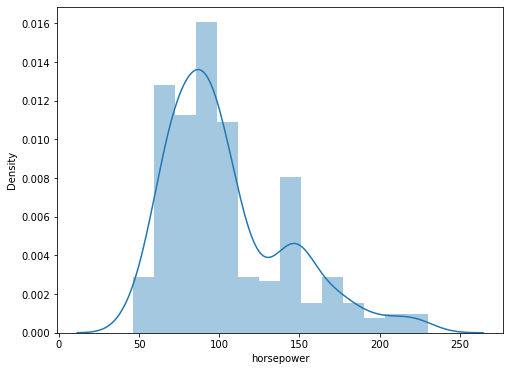

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(df.horsepower)
plt.show()

In [19]:
ad.horsepower=np.log(ad.horsepower)

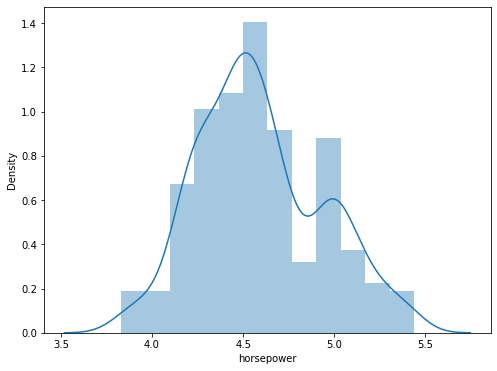

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(ad.horsepower)
plt.show()

In [21]:
# let's visualize the distribution of the features of the cars

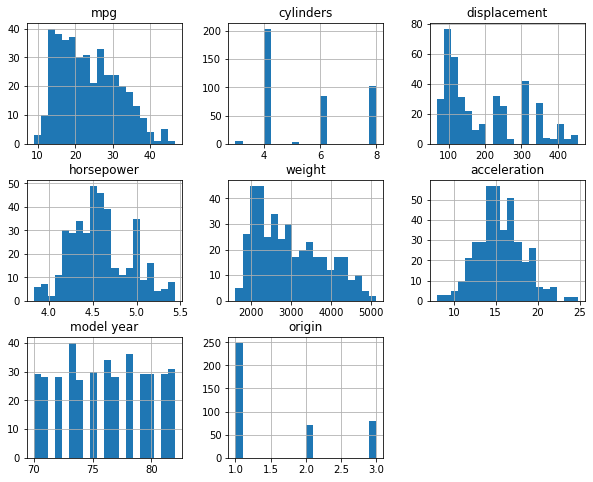

In [22]:
ad.hist(figsize=(10,8), bins=20)
plt.show()

In [23]:
#visualize the TOP-10 horsepower with respect to car
df=ad[['car name','horsepower']].sort_values(by='horsepower',ascending =False)[0:5]

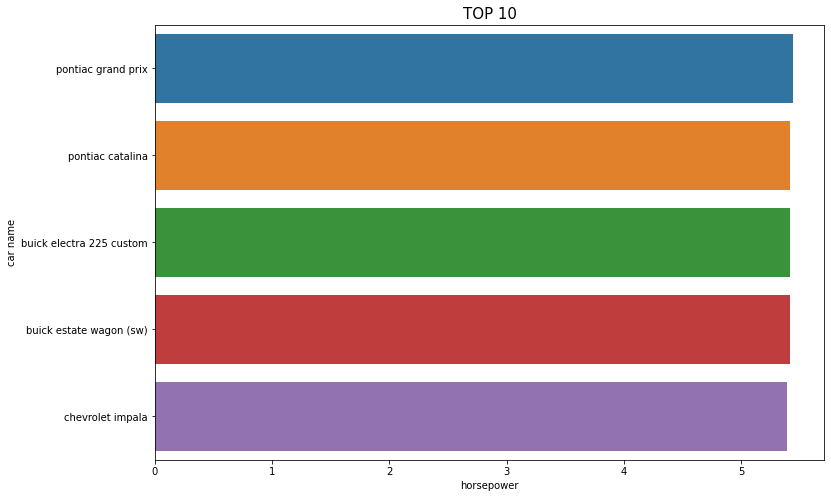

In [24]:
plt.figure(figsize=(12,8))
plt.title('TOP 10', size=15)
sns.barplot(x='horsepower', y='car name', data = df)
plt.show()

In [25]:
#visualize the relationship between variables

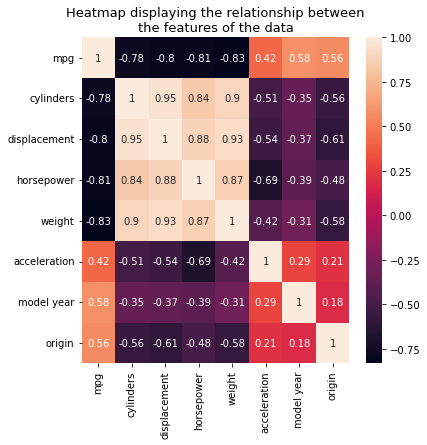

In [26]:
plt.figure(figsize=(6,6))
sns.heatmap(ad.corr(),annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',fontsize=13)
plt.show()

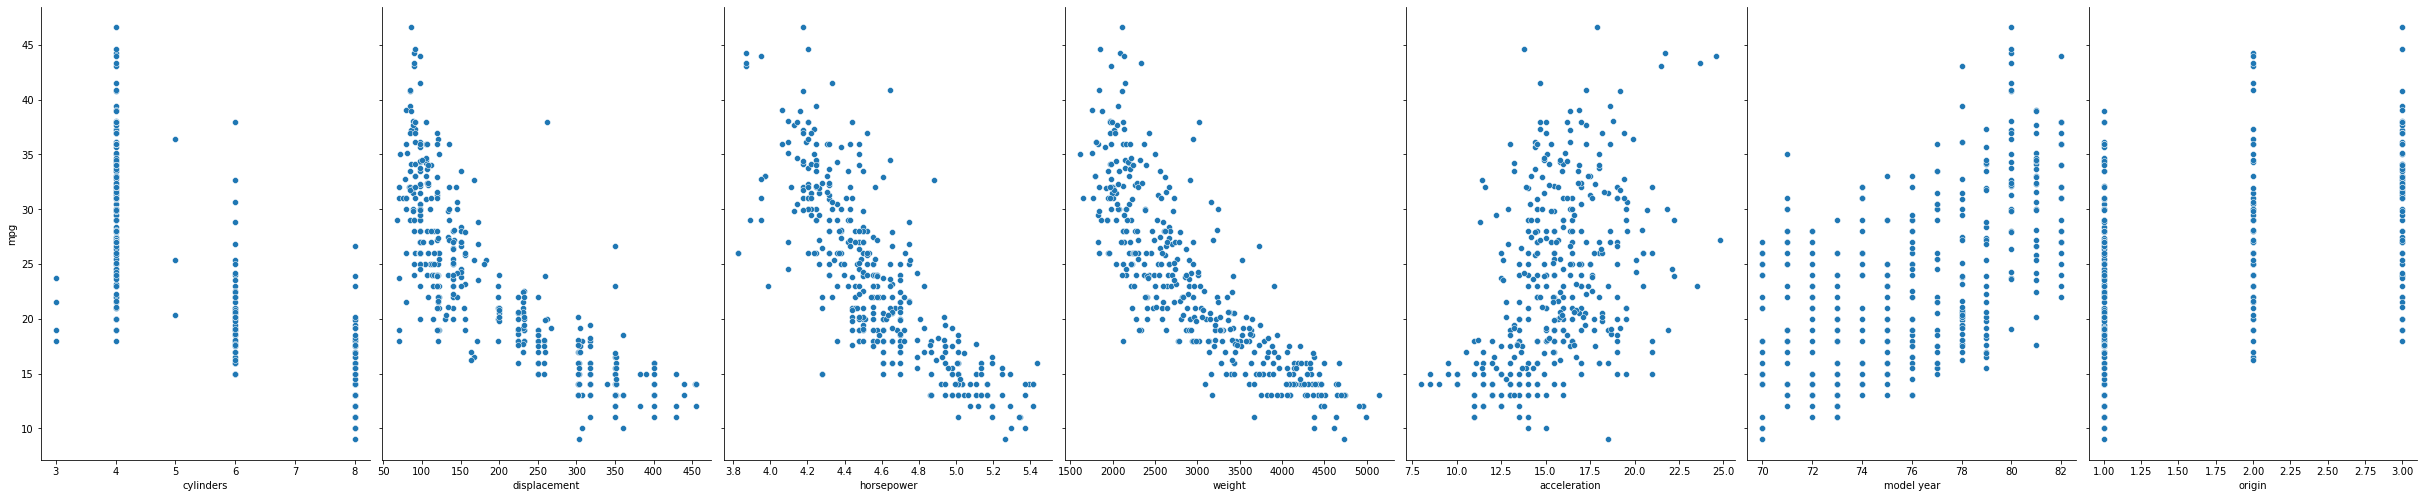

In [27]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad, x_vars=['cylinders','displacement','horsepower','weight','acceleration','model year','origin'], y_vars='mpg', size=7, aspect=0.7)

In [28]:
ad['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

# Preprocessing

In [29]:
data = ad.drop(['car name'],axis=1)

In [30]:
#let's define the dependent and independent variable


In [31]:
X = data.drop(['mpg'], axis=1)
y = data.mpg

In [32]:
X.shape

(398, 7)

In [33]:
y.shape

(398,)

# Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [36]:
X_train.shape

(298, 7)

In [37]:
X_test.shape

(100, 7)

In [38]:
y_train.shape

(298,)

# Standardization

In [39]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [40]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
y_predict = lr.predict(X_test)

In [45]:
y_predict[0:5]


array([34.06180494, 28.3369857 , 21.96100116, 16.76188926, 13.02469115])

In [46]:
y_test[0:5]

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
Name: mpg, dtype: float64

# Model Evaluation

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# score the model on the train set
print('Train score:',lr.score(X_train,y_train))

# score the model on the test set
print('Test score:',lr.score(X_test,y_test))

# calculate the overall accuracy of the model
print('Overall model accuracy:',r2_score(y_test,y_predict))

# compute the mean squared error of the model
print('Mean Squared Error:',mean_squared_error(y_test,y_predict))

Train score: 0.8230638998243396
Test score: 0.8613495315825349
Overall model accuracy: 0.8613495315825349
Mean Squared Error: 7.873061091790622


In [49]:
r2= r2_score(y_test,y_predict)

In [50]:
# Adjusted R2 score
1-(1-r2)*(len(data)-1)/(len(data)-7-1)

0.8588609334314522

In [51]:
lr.coef_

array([-0.32200238,  1.81570087, -3.26938402, -6.72195006, -0.71725671,
        4.51480409,  1.50946469])

In [52]:
residuals = y_test.values-y_predict


In [53]:
residuals

array([-1.06180494, -0.3369857 , -2.96100116, -3.76188926,  0.97530885,
       -0.19696367, -2.91973536,  2.70208492,  0.24089962, -0.21939647,
        1.30542632,  1.75382343,  1.37082477,  0.53766615,  0.53923381,
        3.67569468,  2.35386467, -6.34638324, -0.14501269, -4.5214915 ,
       -2.351393  ,  2.2761284 , -4.96947645,  5.47332973,  1.87731679,
       10.79178493,  0.38835248, -0.28214366, -3.12233149,  1.77525505,
       -0.88664876,  1.87392266,  3.71729619, -2.2244312 ,  2.71002762,
        3.8078354 , -1.73609504, -1.53125217,  3.00052896,  2.26548857,
        1.35064254, -1.07141279, -2.74322661,  2.45869999, -2.24996042,
        1.9780693 , -1.95099429,  0.92360301,  2.61518557, -3.21543373,
       -0.9733754 , -0.24891322, -0.16462002,  1.74831304, -3.44809164,
        2.88094494, -0.62229727,  0.0870591 ,  4.80426351, -1.90265904,
       -4.93974748, -0.39331631, -1.01453834,  0.1720489 ,  1.81656039,
       -1.18415554, -0.8775366 ,  2.25983321, -2.90395286, -0.94

In [54]:
mean_residuals = np.mean(residuals)
print("Mean of Residuals :",mean_residuals)

Mean of Residuals : 0.00046282837192325845


### Check for normality of error terms

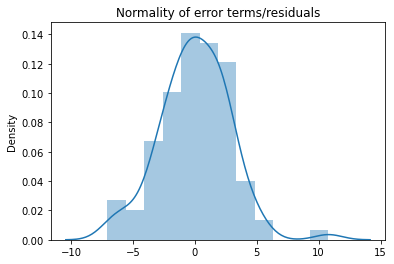

In [55]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### No Autocorrelation

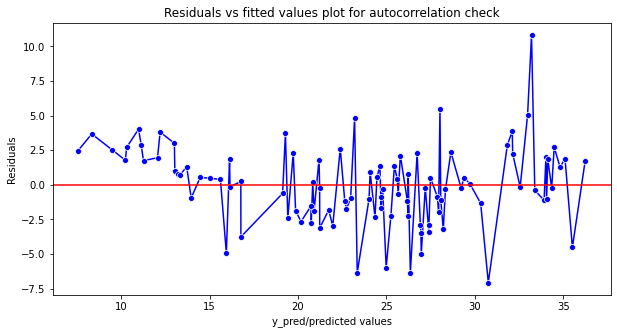

In [56]:
plt.figure(figsize=(10,5))
sns.lineplot(y_predict,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.axhline(0.0,color='red')
plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

In [57]:
# If the value of durbin_watson  = 2, it implies no autocorrelation 
# If the value of durbin_watson lies between  0 and 2, it implies positive autocorrelation.
# If the value of durbin_watson lies between  2 and 4, it implies negative autocorrelation.
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(residuals)

2.2766337819334126

### Multicollinearity

In [58]:
R2=r2_score(y_test,y_predict)

In [59]:
#T=1-r2
T=1-R2

In [60]:
T

0.1386504684174651

In [61]:
VIF = 1 / (1 - R2)

In [62]:
VIF

7.212380970752171

In [63]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
result=model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              214.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                   5.96e-111
Time:                        19:28:10   Log-Likelihood:                         -1108.9
No. Observations:                 298   AIC:                                      2232.
Df Residuals:                     291   BIC:                                      2258.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Gradient boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
reg=GradientBoostingRegressor(learning_rate=0.2,n_estimators=100)
reg.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2)

In [66]:
y_pred5=reg.predict(X_test)

In [67]:
r2=r2_score(y_test,y_pred5)

In [68]:
r2

0.880249045579536

In [69]:
linear_pred = lr.predict(X_test) 

# score the model on the train set
print('Train score:',(reg.score(X_train,y_train)))

# score the model on the test set
print('Test score:',reg.score(X_test,y_test))

# calculate the overall accuracy of the model
print('Overall model accuracy:',r2_score(y_test,y_pred5))

# compute the mean squared error of the model
print('Mean Squared Error:',mean_squared_error(y_test,y_pred5))

Train score: 0.9888592038344722
Test score: 0.880249045579536
Overall model accuracy: 0.880249045579536
Mean Squared Error: 6.799880236349688


# Lasso

In [90]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha =0.0001)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)


In [91]:
r2=r2_score(y_test,y_pred1)


In [92]:
r2

0.8613290069069036

In [73]:
# score the model on the train set
print('Train score:',lasso.score(X_train,y_train))

# score the model on the test set
print('Test score:',lasso.score(X_test,y_test))

# calculate the overall accuracy of the model
print('Overall model accuracy:',r2_score(y_test,y_pred1))

# compute the mean squared error of the model
print('Mean Squared Error:',mean_squared_error(y_test,y_pred1))

Train score: 0.8195607105940843
Test score: 0.8568372493099635
Overall model accuracy: 0.8568372493099635
Mean Squared Error: 8.129284344411698


# Ridge

In [74]:
from sklearn.linear_model import Ridge

# Train the model
Ridge = Ridge(alpha = 0.03)
Ridge.fit(X_train,y_train)
y_pred2 = Ridge.predict(X_test)

In [75]:
r2=r2_score(y_test,y_pred2)


In [76]:
r2

0.8613481569616896

In [77]:
# score the model on the train set
print('Train score:',Ridge.score(X_train,y_train))

# score the model on the test set
print('Test score:',Ridge.score(X_test,y_test))

# calculate the overall accuracy of the model
print('Overall model accuracy:',r2_score(y_test,y_pred2))

# compute the mean squared error of the model
print('Mean Squared Error:',mean_squared_error(y_test,y_pred2))

Train score: 0.8230636093690246
Test score: 0.8613481569616896
Overall model accuracy: 0.8613481569616896
Mean Squared Error: 7.873139147595385
